In [2]:
#from data import *
from loss import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
from dataset_class import *
from functions import *
import torch
import torchvision
from torchvision import models
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
from soft_dice import *
from softmax_dice import *
from monai.losses.dice import DiceLoss
from monai.losses import DiceCELoss, DiceFocalLoss,GeneralizedDiceLoss

classes = ['Background','Front Door','Rear Door','Side Front','Frame','Front Bumper','Hood','7','Rear Bumper']

In [3]:
test_ids = []
with open('test_ids.txt') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(',')]
        test_ids.append(inner_list[0][:-4])

In [6]:
train_ids = numpy.load('train_ids.npy').tolist()
val_ids = numpy.load('val_ids.npy').tolist()
test_ids = numpy.load('test_ids.npy').tolist()
gan_ls = [i[:-5] for i in open('cycle_gan_files.txt', 'r') if i[:-5]!='149']
train_ids = [i for i in train_ids if i not in gan_ls] #+ gan_ls[:150]
train_ids = [i for i in train_ids if i not in test_ids]

dataset_train = BasicDataset('cleaner_data', train_ids, num_cad=100,train=True,merge=False,tran=False) #num_cad=150,train=False)
dataset_val = BasicDataset('cleaner_data', val_ids, num_cad=0,train=False)
dataset_test = BasicDataset('cleaner_data', test_ids, num_cad=0,train=False,merge=False,tran=False)


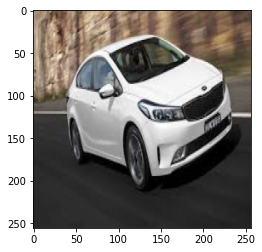

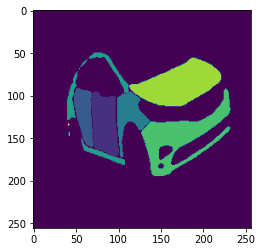

In [13]:
img,trg = dataset_test[1]
plt.imshow(dataset_train.unnorm(img).transpose(0,1).transpose(1,-1)/255)
plt.show()
plt.imshow(trg.argmax(0))

# Model with Deloitte data

In [6]:
import torch.optim as optim
#MAX_POWER = True
n_classes = 9 #19
mod = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False)
#for module in mod.modules():
#    module.requires_grad = False
mod.aux_classifier = None
mod.classifier[-1] = nn.Conv2d(256, n_classes, kernel_size=(1, 1), stride=(1, 1))
#diction = torch.load('Untitled Folder/dice_final_best.pth')
#diction = {i[7:]:diction[i] for i in diction}
#mod.load_state_dict(diction)
#mod.classifier[-1] = nn.Conv2d(256, 9, kernel_size=(1, 1), stride=(1, 1))
#device = 'cuda'
loss_fn = DiceLoss(softmax=True) #nn.CrossEntropyLoss() 
#loss_fn = torch.hub.load(
#    'adeelh/pytorch-multi-class-focal-loss',
#    model='focal_loss',
#    #alpha=class_weights,
#    gamma=2,
#    reduction='mean',
#    device='cuda',
#    dtype=torch.float32,
#    force_reload=False)
#ContrastiveLoss(batch_size)#DiceFocalLoss(softmax=True)#nn.CrossEntropyLoss(weight=ws)#DiceCELoss(ce_weight=,softmax=True)
#SoftDiceLossV2() #diceloss() #DiceLoss(softmax=True)DiceFocalLoss(softmax=True)

opt = optim.Adam(mod.parameters())
flag = True

In [8]:
# code for generating background

#model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
#model.eval()
#img,mask = next(iter(trainLoader))
#out = model(img/255)


#for i,(img,mask) in enumerate(dataset_train):
#    out = model(img.unsqueeze(0)/255)
#    masks = out[0]['masks']
#    masks[out[0]['labels'] != 3] = 0
#    hist = masks.sum(axis=-1).sum(axis=-1)
#    idx = torch.argmax(hist)
#    mask = masks[idx][0].detach()>0.5
#    torch.save(mask,'Untitled Folder 1/' + dataset_train.ids[i] + '.pth' )
#    print(i,'/',len(dataset_train))
#
#ind = [i for i in range(10) if i not in [0,4]]
#joined = torch.cat([mask,joiner]).detach().numpy() 
#plt.imshow(joined[ind].argmax(axis=0))
#n=1000
#target = torch.rand([n,3,200,200])
#target[target<=0.5] = 0
#target[target != 0] = 1
#pred = torch.rand([n,3,200,200])
#
#print(loss_fn(pred,target))
#
#
#target = torch.rand([2*n,3,200,200])
#target[target<=0.5] = 0
#target[target != 0] = 1
#pred = torch.rand([2*n,3,200,200])
#
#print(loss_fn(pred,target))

In [9]:
import wandb

wandb.init(
  project="from scratch",
  notes="dice_loss, background, Transfer",
  tags=['car_class'],
    entity="jensp")


#images,_ = next(iter(trainLoader))
#torch.onnx.export(mod.cpu(),images, "model.onnx")
#wandb.save("model.onnx")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jensp (use `wandb login --relogin` to force relogin)


In [16]:
batch_size = 64*2
num_workers = 2
trainLoader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True,
                         drop_last=True,num_workers=num_workers)
valLoader = DataLoader(dataset_val, batch_size=batch_size, shuffle=False,
                         drop_last=False,num_workers=num_workers)

opt = optim.Adam(mod.parameters())
MAX_POWER = True
device = 'cuda'
mod = mod.to(device)
lr = 1e-4
opt = optim.Adam(mod.parameters(),lr)

#wandb.watch(
#    mod, criterion=None, log="gradients", log_freq=len(trainLoader), idx=None,
#    log_graph=(True)
#)
loss_fn = DiceLoss(softmax=True)

In [18]:
for module in mod.modules():
    module.requires_grad = True

* Epoch 1/10
0 batch loss =  tensor(0.4517, device='cuda:0', grad_fn=<MeanBackward0>)


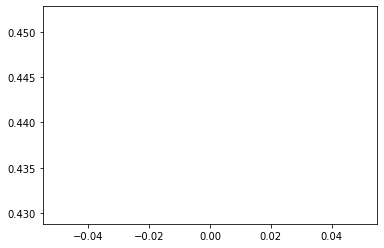

* Epoch 2/10
0 batch loss =  tensor(0.4563, device='cuda:0', grad_fn=<MeanBackward0>)


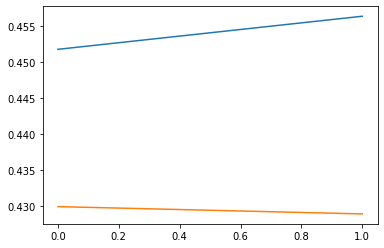

* Epoch 3/10
0 batch loss =  tensor(0.4550, device='cuda:0', grad_fn=<MeanBackward0>)


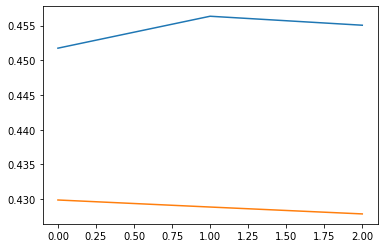

* Epoch 4/10
0 batch loss =  tensor(0.4436, device='cuda:0', grad_fn=<MeanBackward0>)


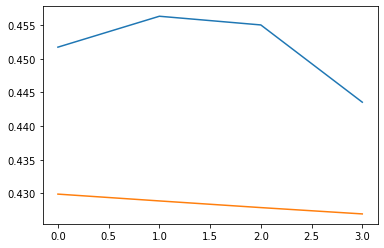

* Epoch 5/10
0 batch loss =  tensor(0.4561, device='cuda:0', grad_fn=<MeanBackward0>)


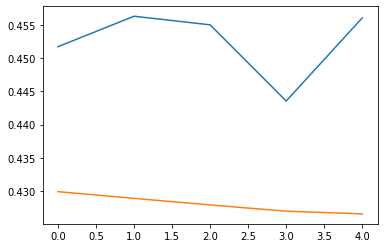

* Epoch 6/10
0 batch loss =  tensor(0.4472, device='cuda:0', grad_fn=<MeanBackward0>)


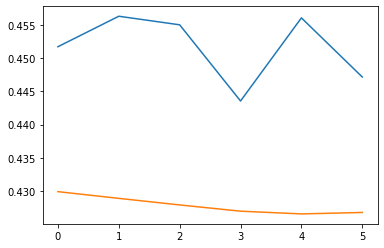

* Epoch 7/10
0 batch loss =  tensor(0.4533, device='cuda:0', grad_fn=<MeanBackward0>)


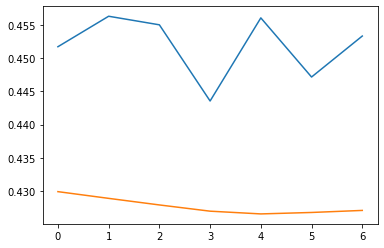

* Epoch 8/10
0 batch loss =  tensor(0.4410, device='cuda:0', grad_fn=<MeanBackward0>)


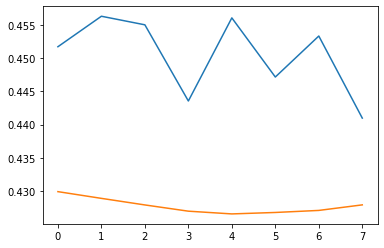

* Epoch 9/10
0 batch loss =  tensor(0.4563, device='cuda:0', grad_fn=<MeanBackward0>)


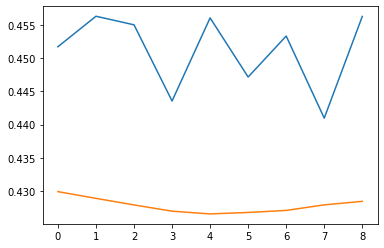

* Epoch 10/10
0 batch loss =  tensor(0.4412, device='cuda:0', grad_fn=<MeanBackward0>)


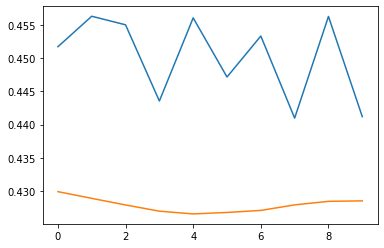

In [24]:
epochs = 10
device = 'cuda'
if torch.cuda.device_count() > 1 and MAX_POWER and flag:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    mod = nn.DataParallel(mod)
    flag = False
train_loss_lst = []
val_loss_lst = []
for epoch in range(epochs):
    print('* Epoch %d/%d' % (epoch+1, epochs))
    epoch_loss = 0
    val_loss = 0
    mod.train()  # train mode
    for b, (X_batch,Y_batch) in enumerate(trainLoader):
        #Y_batch = torch.argmax(Y_batch.to(device), dim=1).long()
        # set parameter gradients to zero
        opt.zero_grad()

        # forward
        Y_pred = mod(X_batch.to(device))['out']
        Y_batch = Y_batch.to(device)
        loss = loss_fn(Y_pred, Y_batch) 
        loss.backward()  # backward-pass
        opt.step()  # update weights

        # calculate metrics to show the user
        epoch_loss += loss.detach().item()
        if ((b) % 2) == 0:
            print(b,"batch loss = ", loss)
            
    mod.eval()
    with torch.no_grad():  # inference mode
        for X_batch,Y_batch in valLoader:
            #Y_batch = torch.argmax(Y_batch.to(device), dim=1).long()
            Y_pred = mod(X_batch.to(device))['out']
            val_loss += loss_fn(Y_pred, Y_batch.to(device)).detach().item()
    
    val_loss = val_loss/(len(valLoader))    #*val_batch_sz)
    epoch_loss = epoch_loss/(len(trainLoader))
    train_loss_lst.append(epoch_loss)
    val_loss_lst.append(val_loss)
    plt.plot(train_loss_lst)
    plt.plot(val_loss_lst)
    plt.show()
    
    wandb.log({"epoch_loss": epoch_loss,
              "val_loss": val_loss})

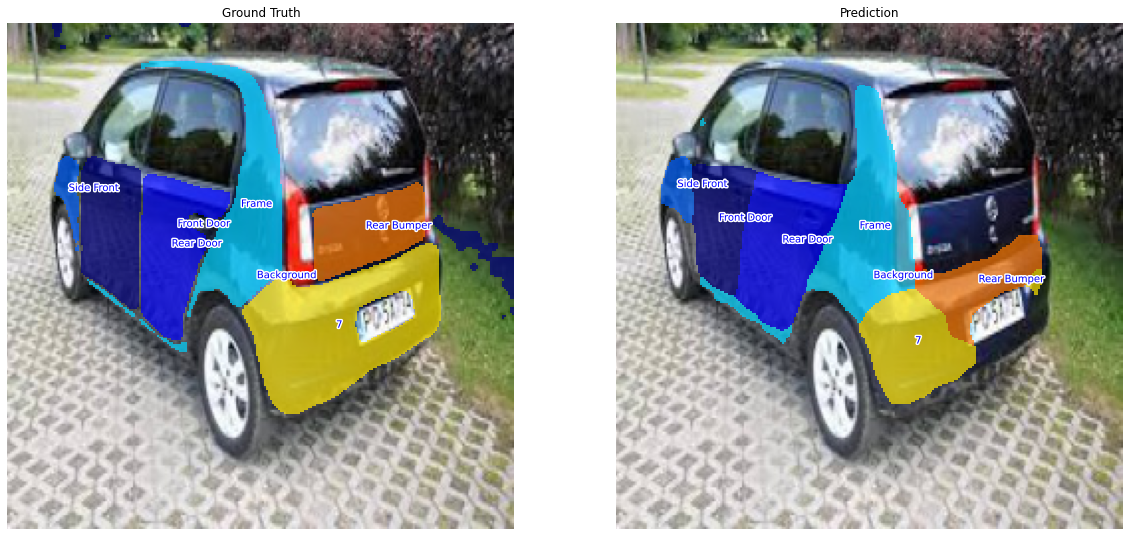

In [20]:
device = 'cpu'
mod.eval()
i = 8
mod = mod.cuda()
img, mask= dataset_test[i]
img = img.cuda()
out = mod(img.unsqueeze(0))['out'][0].cpu().detach()

plot_eval(dataset_train.unnorm(img.cpu()),mask,out,classes,(20,20),10)

In [9]:
testLoader = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False,
                         drop_last=False,num_workers=4)

device = 'cuda'
mod = mod.to(device)
mod.eval()
val_loss = 0
## only one batch when run
with torch.no_grad():
    for X_batch,Y_batch in testLoader:
        Y_pred = mod(X_batch.to(device))['out']
        y_pred = (Y_pred.softmax(axis=1) >= 1/9)
        gt = (Y_batch.to(device) == 1)
        TP = (gt&y_pred).sum(axis=0).sum(-1).sum(-1)
        denom = gt.sum(axis=0).sum(-1).sum(-1) + y_pred.sum(axis=0).sum(-1).sum(-1)
        preds = Y_pred.softmax(axis=1).argmax(1).view(-1)
        ground = Y_batch.argmax(1).view(-1)
        acc = torch.sum(preds == ground.to(device))/len(preds)
        dice = torch.mean(2*TP/denom)
        wandb.log({"dice": dice,
                   "acc": acc})

In [22]:
acc

tensor(0.9108, device='cuda:0')

In [23]:
dice

tensor(0.7275, device='cuda:0')

In [49]:
tens = torch.zeros([9])
for X_batch,Y_batch in trainLoader:
    tens += Y_batch.sum(-1).sum(-1).sum(0)

<BarContainer object of 9 artists>

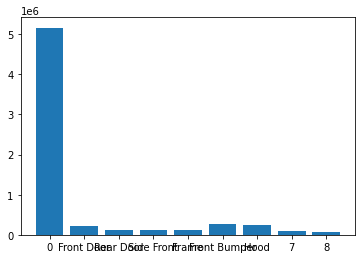

In [42]:
plt.bar(classes,Y_batch.sum(-1).sum(-1).sum(0))

<BarContainer object of 9 artists>

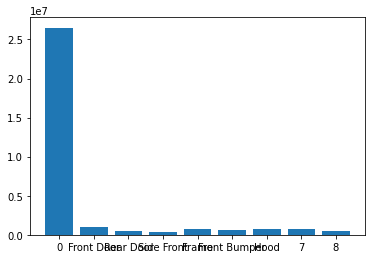

In [51]:
plt.bar(classes,tens)